# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression

# The Data

In [3]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

# Looking for relationship

In [6]:
df.corr()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


<AxesSubplot:>

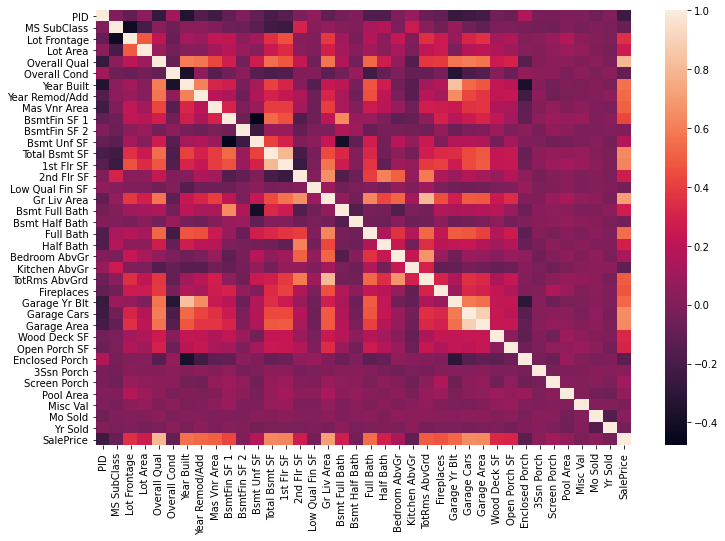

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

Observed that there are lots of features that are not really related with "SalePrice". This means, these features (low correlation) will not much affect the "SalePrice".

There are also some features that are dependent towards each other. For example, 'Year Built' and 'Garage Yr Blt'. We can see a bright spot on the heat map. This shows high corr. The corr table shows 0.834849 correlation between theese 2 features. This need to be handled too.

But before we go for features correlated with other features, let's see features that have high corr with "SalePrice" first !

In [8]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

"Overall Qual" has the highest correlation with "SalePrice"

Now let's see how "Overall Qual" is distributed according to its ratings

In [9]:
df.corr()['Overall Qual'].sort_values()

PID               -0.263147
Kitchen AbvGr     -0.159744
Enclosed Porch    -0.140332
Overall Cond      -0.094812
Low Qual Fin SF   -0.048680
Bsmt Half Bath    -0.041647
BsmtFin SF 2      -0.041287
Yr Sold           -0.020719
Misc Val           0.005179
3Ssn Porch         0.018240
Pool Area          0.030399
Mo Sold            0.031103
MS SubClass        0.039419
Screen Porch       0.041615
Bedroom AbvGr      0.063291
Lot Area           0.097188
Bsmt Full Bath     0.167858
Lot Frontage       0.212042
2nd Flr SF         0.241402
Wood Deck SF       0.255663
Half Bath          0.268853
Bsmt Unf SF        0.270058
BsmtFin SF 1       0.284118
Open Porch SF      0.298412
TotRms AbvGrd      0.380693
Fireplaces         0.393007
Mas Vnr Area       0.429418
1st Flr SF         0.477837
Full Bath          0.522263
Total Bsmt SF      0.547294
Garage Area        0.563503
Year Remod/Add     0.569609
Gr Liv Area        0.570556
Garage Yr Blt      0.570569
Year Built         0.597027
Garage Cars        0

Some features have high (> 0.5) corr with overall quality

In [10]:
df['Overall Qual']

0       6
1       5
2       6
3       7
4       5
       ..
2925    6
2926    5
2927    5
2928    5
2929    7
Name: Overall Qual, Length: 2930, dtype: int64

<Figure size 1080x1080 with 0 Axes>

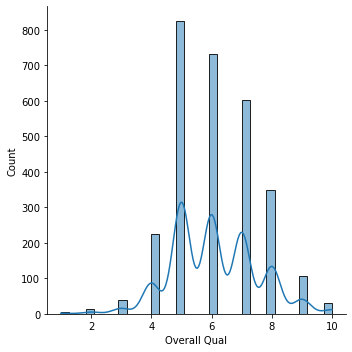

In [11]:
plt.figure(figsize=(15,15))
sns.displot(df['Overall Qual'],kde=True)
plt.show()

"Overall Qual" rated 5 has the highest count in the dataset

## Learning your data from scatter plot 

Now let's see how "Overall Qual" is related to "SalePrice" in a ScatterPlot

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

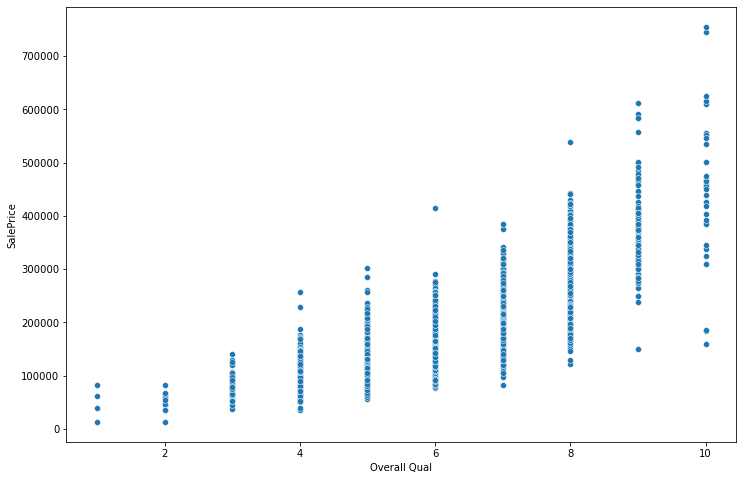

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Overall Qual', y ='SalePrice',data=df)

Now lets try to find out the houses that have the top 2 highest ratings of overall quality, but have the sales price as low as <200,000

Base on the corr with other features, try to find out why these houses have low sales price.

In [13]:
df[(df['Overall Qual']>8)&(df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [14]:
df.index[df['Overall Qual']>8] & df.index[df['SalePrice']<200000]

Int64Index([1182, 1498, 2180, 2181], dtype='int64')

These 4 houses can be categorized as outliers

Wait a minute, lets relate this 4 odd data with some other features that have high corr with the overall quality !

In [15]:
df[(df['Overall Qual']>8)&(df['SalePrice']<200000)][['Garage Cars','Year Built','Garage Yr Blt','Gr Liv Area','Year Remod/Add','Garage Area','Total Bsmt SF','Full Bath']]

,Garage Cars,Year Built,Garage Yr Blt,Gr Liv Area,Year Remod/Add,Garage Area,Total Bsmt SF,Full Bath
1182,3.0,1977,1977.0,2944,1977,864.0,994.0,2
1498,2.0,2008,2008.0,5642,2008,1418.0,6110.0,2
2180,3.0,2008,2008.0,5095,2009,1154.0,5095.0,2
2181,3.0,2007,2007.0,4676,2008,884.0,3138.0,3


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

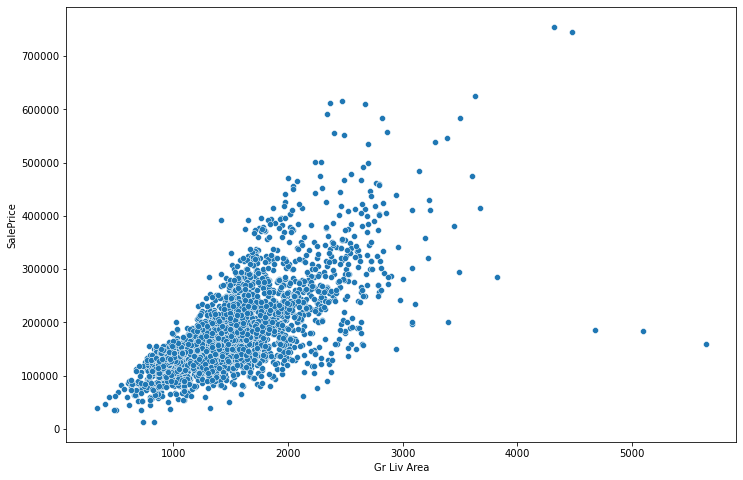

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gr Liv Area', y ='SalePrice',data=df)

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

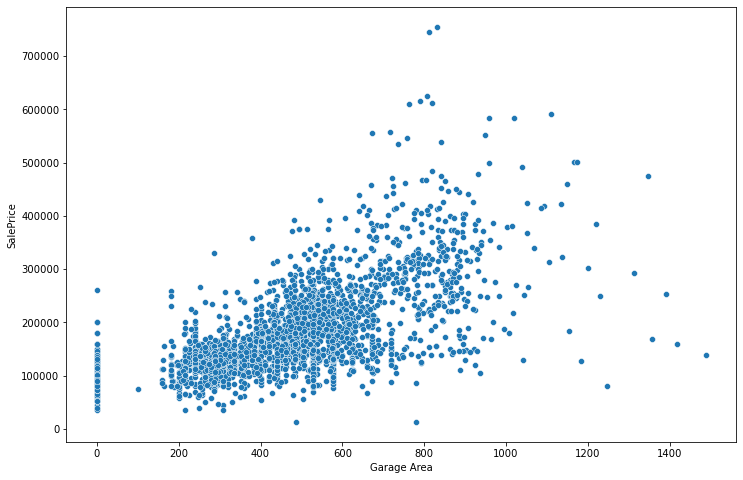

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Area', y ='SalePrice',data=df)

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

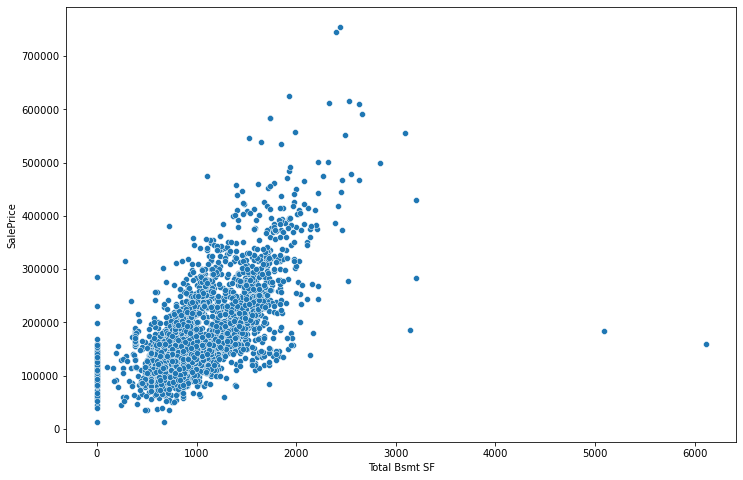

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Bsmt SF', y ='SalePrice',data=df)

From this, we can conclude that 1182 has a very low sales price for many good reasons. Hence, I dont consider it as an outlier. 

1498, 2180, & 2181 are the odds, so fall under the outliers.

### Let's remove these 3 outliers !

In [19]:
OverallQual_drop1 = df.loc[[1498, 2180, 2181]].index
OverallQual_drop1

Int64Index([1498, 2180, 2181], dtype='int64')

In [20]:
df = df.drop(OverallQual_drop1)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

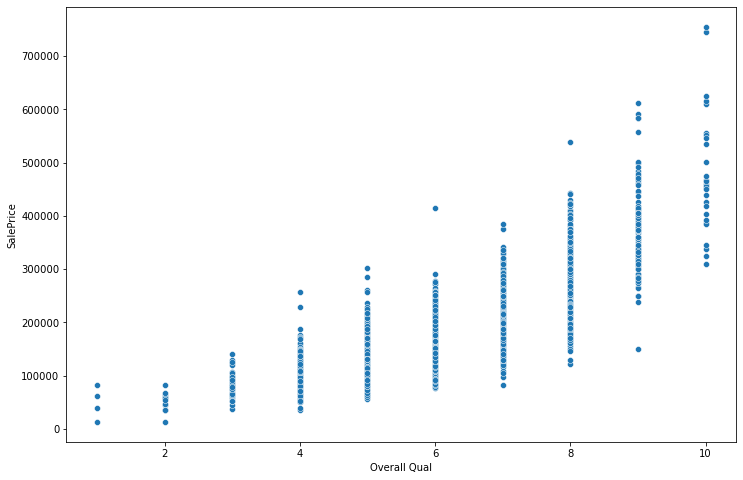

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Overall Qual', y ='SalePrice',data=df)

Compare this scatter plot with the previous scatter plot in Out[12]

You can observe, some of the outliers are removed.

# Learning your data from box plot 

<AxesSubplot:xlabel='Overall Qual'>

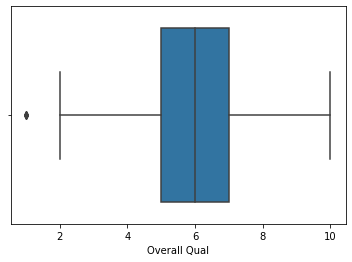

In [22]:
sns.boxplot(x='Overall Qual',whis=1.5, data=df)

The boxplot shows the median of the count of overal quality ratings is 6.

According to the boxplot, the outliers are those in the overall quality rating <2.

Let's plot the boxplot throughout the overall quality ratings, with respect to the sales price.

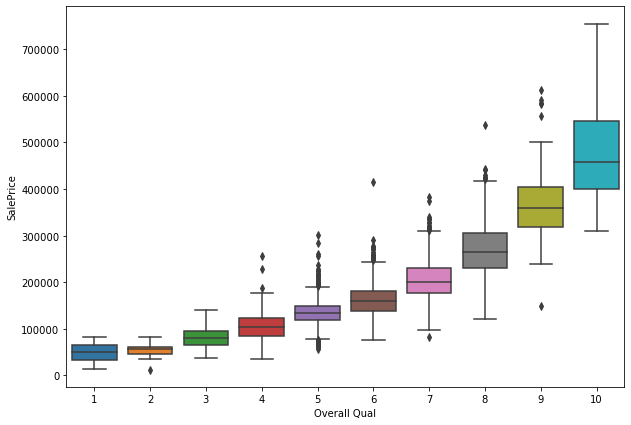

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='Overall Qual',y='SalePrice', whis=1.5)
plt.show()

Based on Out[17], the outliers are those ratings <2. Lets find em !

In [24]:
overall_qual = df['Overall Qual']<2

In [25]:
df[overall_qual]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
765,904301375,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,61000
1553,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,13100
1901,534450090,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
2903,923125030,20,A (agr),125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,81500


In [26]:
df[df['Overall Qual']<2].index

Int64Index([765, 1553, 1901, 2903], dtype='int64')

### There's only 4. This can also be seen from the scatter plot from out[11]

This might be recognized as outliers from the boxplot. However, the data follows trend. Besides, if we drop overall qual <2, we dont have data for overall qual <2. How our model gonna predict if the test set has overall qual < 2 ?

In [27]:
# # Assign into a variable "OverallQual_drop"

# OverallQual_drop2 = df[df['Overall Qual']<2].index

In [28]:
# OverallQual_drop2

In [29]:
# Amend data frame

# df = df.drop(OverallQual_drop2)

<AxesSubplot:xlabel='Overall Qual'>

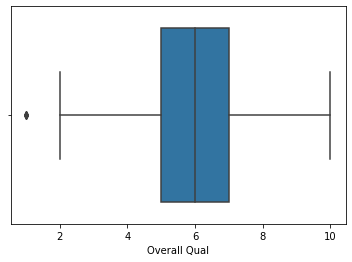

In [30]:
sns.boxplot(x='Overall Qual',whis=1.5, data=df)

Now from the box plot, we can see the outliers has been removed

In [31]:
# plt.figure(figsize=(12,8))
# sns.scatterplot(x='Overall Qual', y ='SalePrice',data=df)

In [32]:
# plt.figure(figsize=(15,15))
# sns.displot(df['Overall Qual'],kde=True)
# plt.show()

In [33]:
# df.corr()['SalePrice'].sort_values()

## Now let's repeat the same steps to remove outliers from a different feature that has high corr with 'SalesPrice' 

#### in this case it would be the 'Gr Liv Area'

Lets see how the "Gr Liv Area" is related to the "SalePrice" in a scatter plot

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

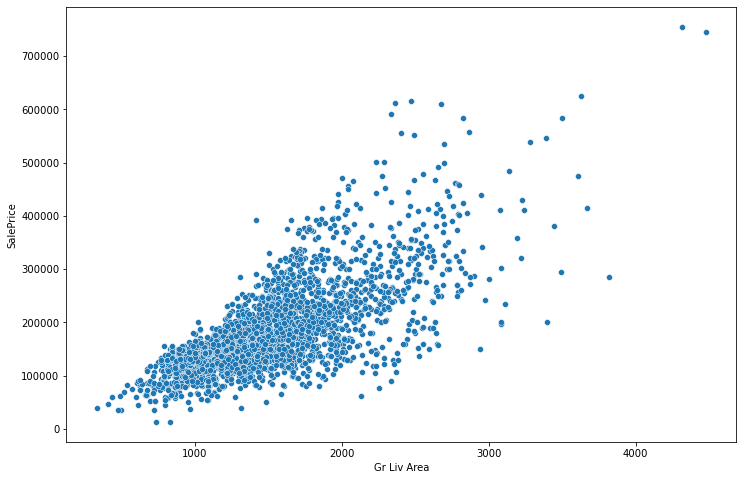

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gr Liv Area', y ='SalePrice',data=df)

Its a continuous data

We can see that sales price increases with the grand living area

The data grand living area > 4000 are quite extreme. They are too expensive. why ?

<Figure size 1080x1080 with 0 Axes>

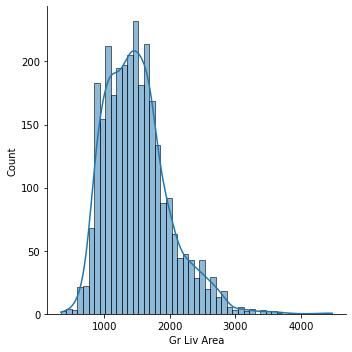

In [35]:
plt.figure(figsize=(15,15))
sns.displot(x = df['Gr Liv Area'],kde=True)
plt.show()

The distribution from the distribution plot shows that the data is positively skewed.

Let's plot a box plot

<AxesSubplot:xlabel='Gr Liv Area'>

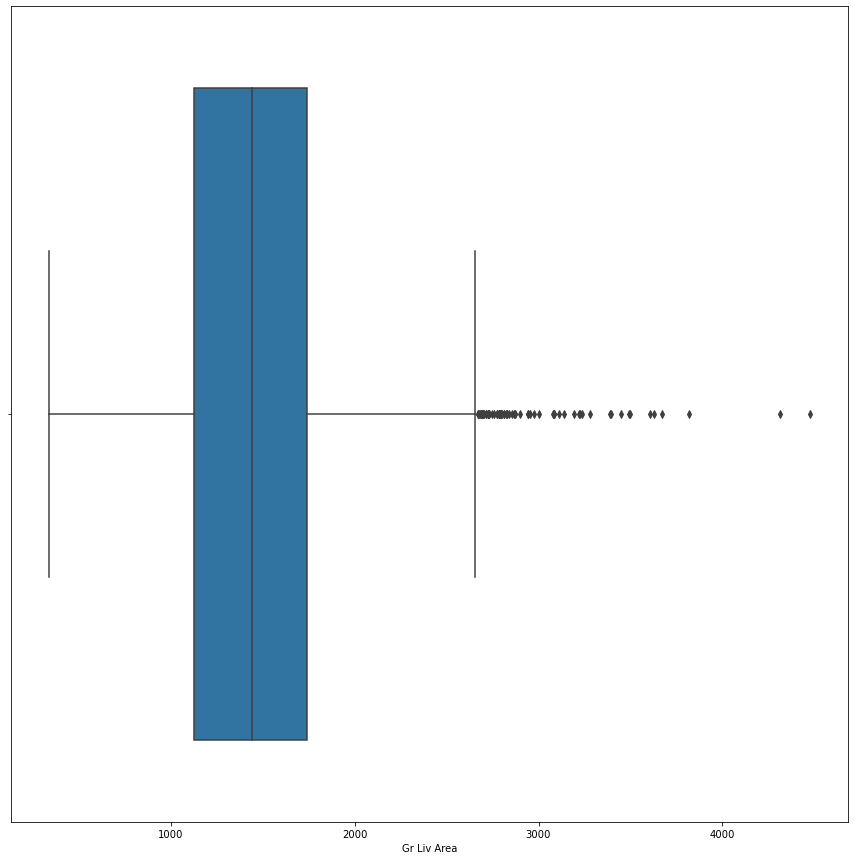

In [38]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Gr Liv Area',whis=1.5)

Based on the boxplot, the outliers are observed to be to the right of the maximum. However lets see if these data are significant

Lets see if any other features that have high correlation with grand living area affecting the sales price.

Lets find features that have high correlation with the grand living area

In [40]:
df.corr()['Gr Liv Area'].sort_values()

PID               -0.118440
Overall Cond      -0.115052
Bsmt Half Bath    -0.053072
Yr Sold           -0.024866
BsmtFin SF 2      -0.016398
Misc Val          -0.006234
Enclosed Porch     0.006865
3Ssn Porch         0.007445
Mo Sold            0.043915
Bsmt Full Bath     0.046535
MS SubClass        0.071855
Screen Porch       0.091403
Low Qual Fin SF    0.100533
Pool Area          0.104174
Kitchen AbvGr      0.122710
BsmtFin SF 1       0.160026
Bsmt Unf SF        0.238169
Year Built         0.239554
Wood Deck SF       0.244085
Lot Area           0.259665
Garage Yr Blt      0.271853
Open Porch SF      0.316614
Year Remod/Add     0.317193
Lot Frontage       0.354990
Mas Vnr Area       0.384307
Total Bsmt SF      0.407639
Half Bath          0.437076
Fireplaces         0.451680
Garage Area        0.476371
Garage Cars        0.494454
Bedroom AbvGr      0.533063
1st Flr SF         0.535045
Overall Qual       0.567771
Full Bath          0.638898
2nd Flr SF         0.666428
SalePrice          0

In [41]:
df[df['Gr Liv Area']>4000][['Bedroom AbvGr','1st Flr SF','Overall Qual','Full Bath','2nd Flr SF','SalePrice','TotRms AbvGrd','Gr Liv Area']]

,Bedroom AbvGr,1st Flr SF,Overall Qual,Full Bath,2nd Flr SF,SalePrice,TotRms AbvGrd,Gr Liv Area
1760,4,2411,10,3,2065,745000,10,4476
1767,4,2444,10,3,1872,755000,10,4316


<AxesSubplot:xlabel='Bedroom AbvGr', ylabel='SalePrice'>

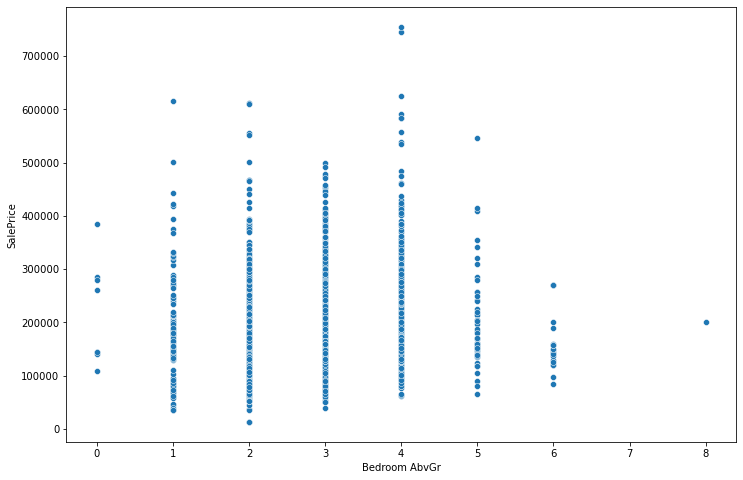

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Bedroom AbvGr', y ='SalePrice',data=df)

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

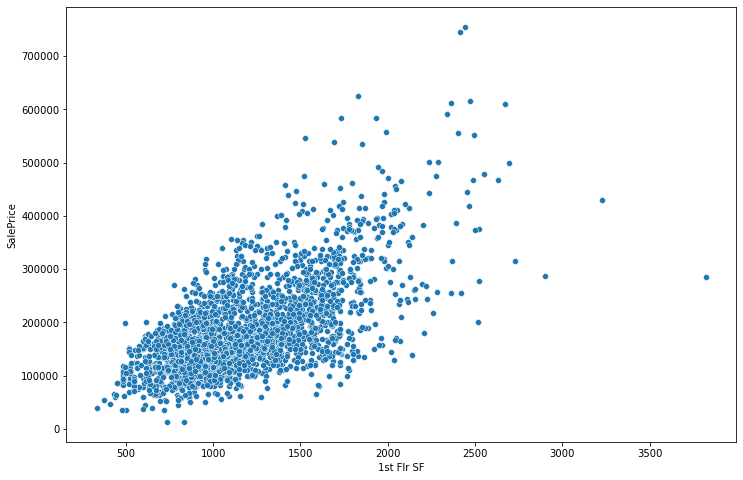

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st Flr SF', y ='SalePrice',data=df)

In [44]:
df['Full Bath'].unique()

array([1, 2, 3, 0, 4], dtype=int64)

<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

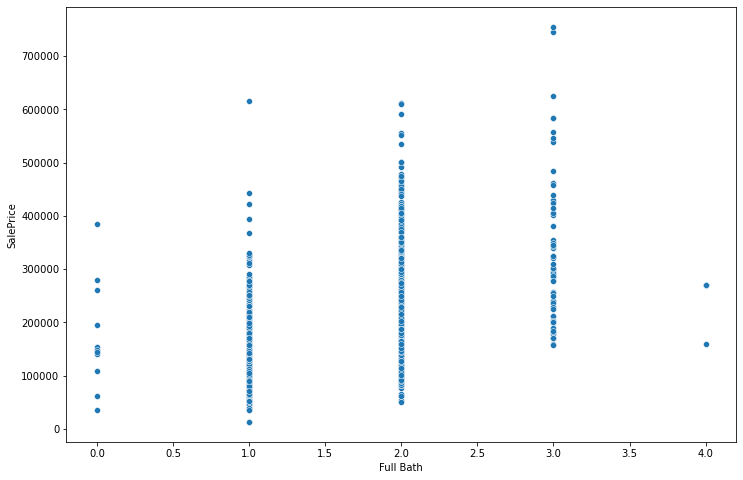

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Full Bath', y ='SalePrice',data=df)

<AxesSubplot:xlabel='2nd Flr SF', ylabel='SalePrice'>

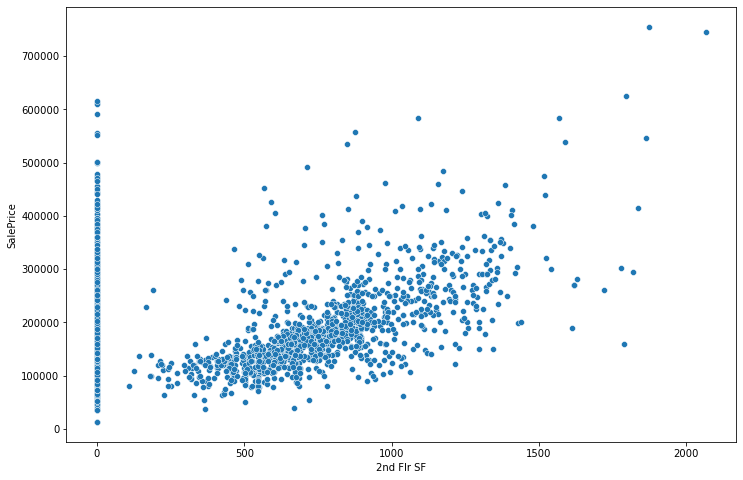

In [46]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='2nd Flr SF', y ='SalePrice',data=df)

<AxesSubplot:xlabel='TotRms AbvGrd', ylabel='SalePrice'>

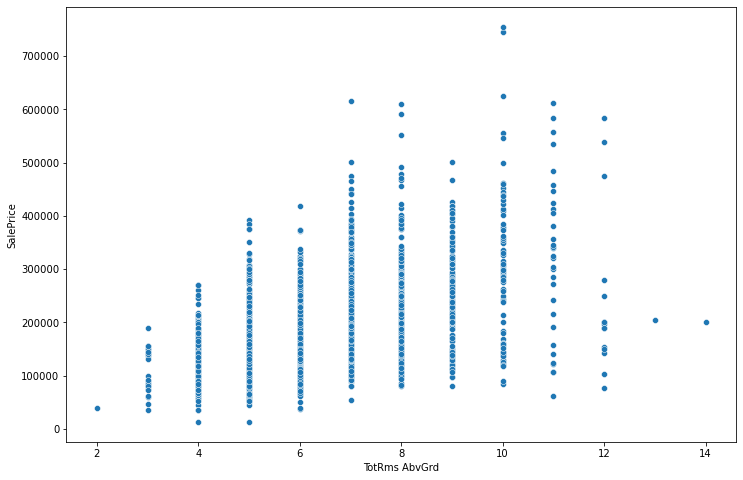

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='TotRms AbvGrd', y ='SalePrice',data=df)

TotRms AbvGrd feature has higher corr with grand living area compare to SalaesPrice.
However, we can see that the salesprice is too high for these data. They lies in the outliers. So we consider this as outliers !

Lets look at the data above 4000

In [48]:
df[(df['Gr Liv Area']>4000)].index

Int64Index([1760, 1767], dtype='int64')

In [49]:
Gr_liv_area = df[(df['Gr Liv Area']>4000)].index

In [50]:
df = df.drop(Gr_liv_area)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

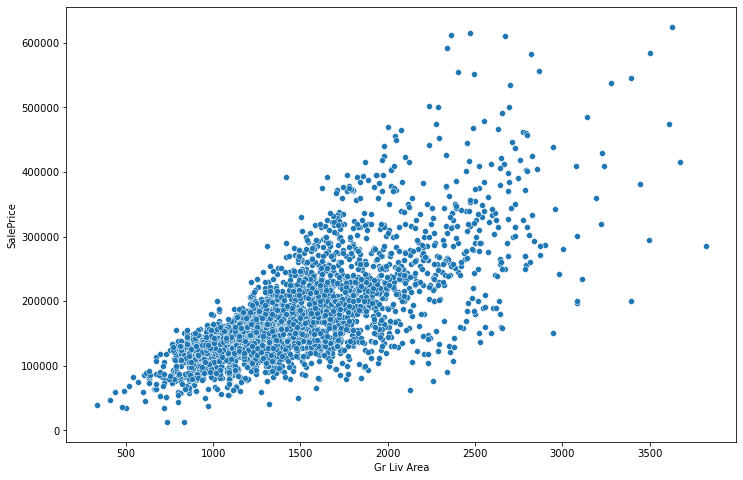

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gr Liv Area', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

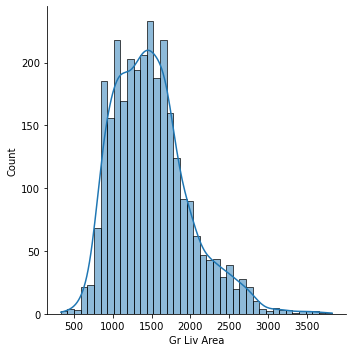

In [52]:
plt.figure(figsize=(15,15))
sns.displot(df['Gr Liv Area'],kde=True)
plt.show()

Distribution is more normal now

<AxesSubplot:xlabel='Gr Liv Area'>

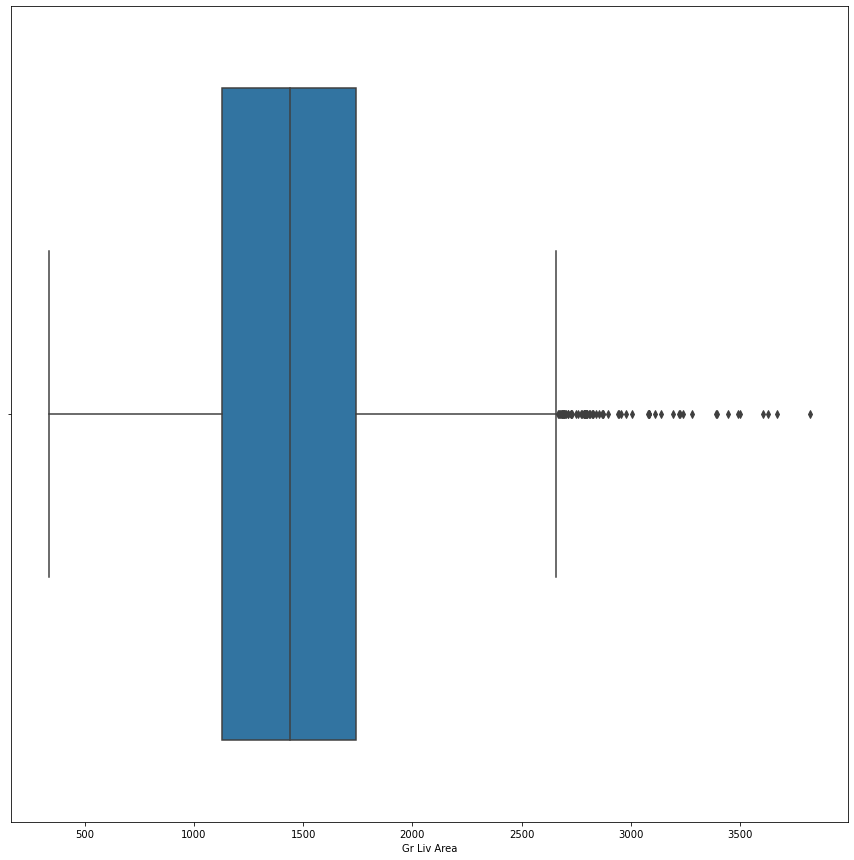

In [53]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Gr Liv Area',whis=1.5)

Lets try to make the distribution more normal

In [55]:
df[(df['Gr Liv Area']>3400)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1306,902207220,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
1497,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700
1537,909282030,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000
2445,528320060,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
2450,528360050,60,RL,114.0,17242,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,584500
2666,902400110,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
2737,905427030,75,RL,60.0,19800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,415000


In [56]:
df[(df['Gr Liv Area']>3400)].index

Int64Index([1306, 1497, 1537, 2445, 2450, 2666, 2737], dtype='int64')

In [57]:
df = df.drop(df[(df['Gr Liv Area']>3400)].index)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

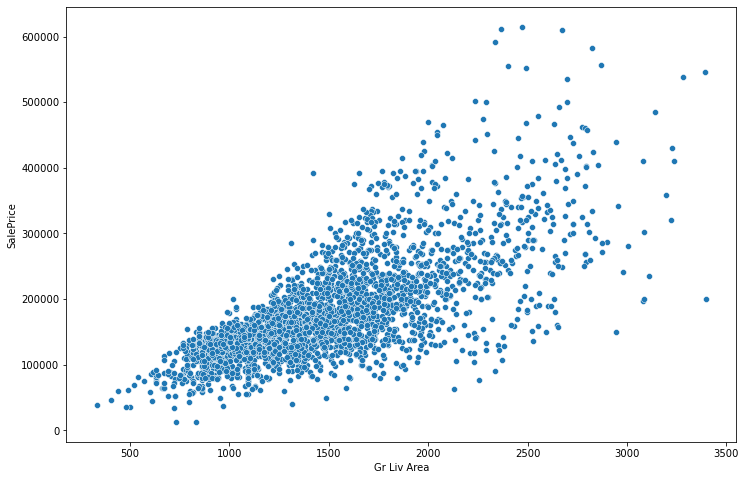

In [58]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gr Liv Area', y ='SalePrice',data=df)

<AxesSubplot:xlabel='Gr Liv Area'>

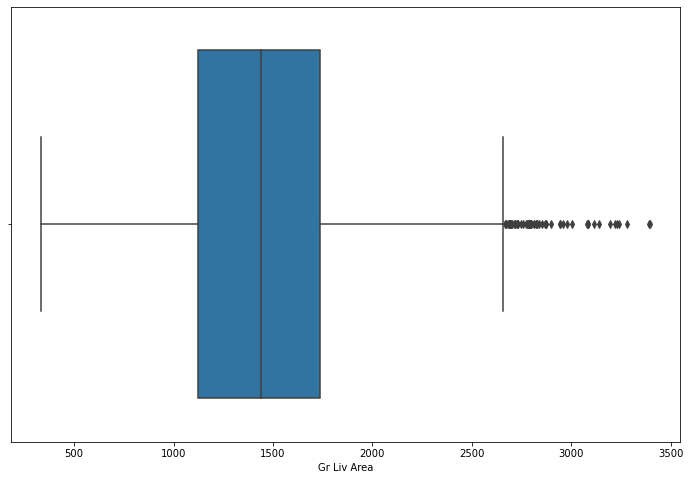

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x = 'Gr Liv Area',whis=1.5)

<Figure size 1080x1080 with 0 Axes>

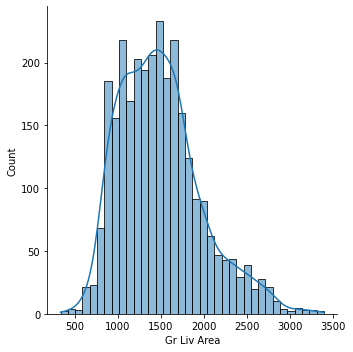

In [60]:
plt.figure(figsize=(15,15))
sns.displot(df['Gr Liv Area'],kde=True)
plt.show()

Even more normal now

In [61]:
df.corr()['SalePrice'].sort_values()

PID               -0.251010
Enclosed Porch    -0.129099
Kitchen AbvGr     -0.121241
Overall Cond      -0.114997
MS SubClass       -0.089174
Low Qual Fin SF   -0.055191
Bsmt Half Bath    -0.044610
Yr Sold           -0.020583
Misc Val          -0.018735
BsmtFin SF 2      -0.004886
3Ssn Porch         0.034665
Pool Area          0.036522
Mo Sold            0.039132
Screen Porch       0.104567
Bedroom AbvGr      0.130252
Bsmt Unf SF        0.186651
2nd Flr SF         0.240725
Lot Area           0.261405
Half Bath          0.280668
Bsmt Full Bath     0.284915
Wood Deck SF       0.314871
Open Porch SF      0.321211
Lot Frontage       0.355927
BsmtFin SF 1       0.451421
Fireplaces         0.473454
TotRms AbvGrd      0.490731
Mas Vnr Area       0.506523
Full Bath          0.538713
Garage Yr Blt      0.539027
Year Remod/Add     0.545183
Year Built         0.580872
1st Flr SF         0.644578
Garage Area        0.646708
Garage Cars        0.653595
Total Bsmt SF      0.663488
Gr Liv Area        0

# Now let's repeat the same steps to remove outliers from a different feature that has high corr with 'SalesPrice'

In [66]:
df['Garage Cars']

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
2925    2.0
2926    2.0
2927    0.0
2928    2.0
2929    3.0
Name: Garage Cars, Length: 2918, dtype: float64

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

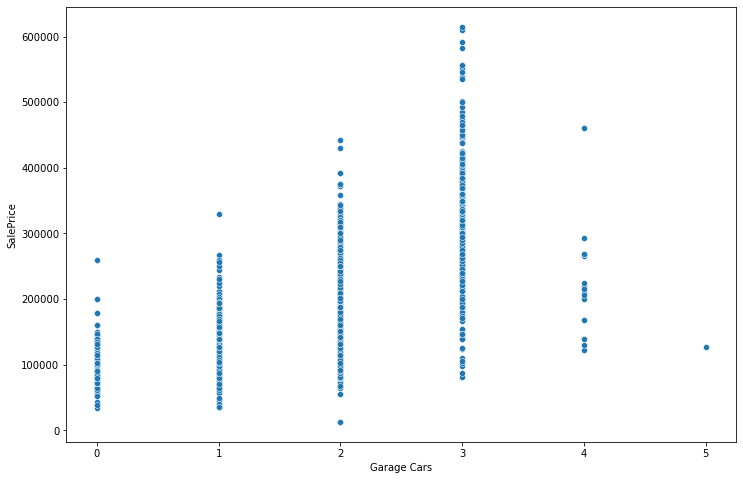

In [67]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Cars',y = 'SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

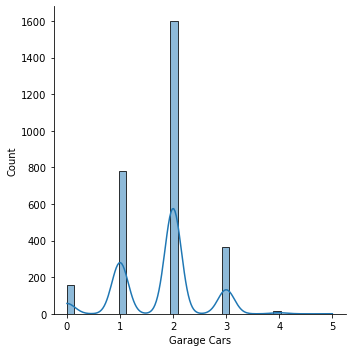

In [68]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Cars'],kde=True)

<AxesSubplot:xlabel='Garage Cars'>

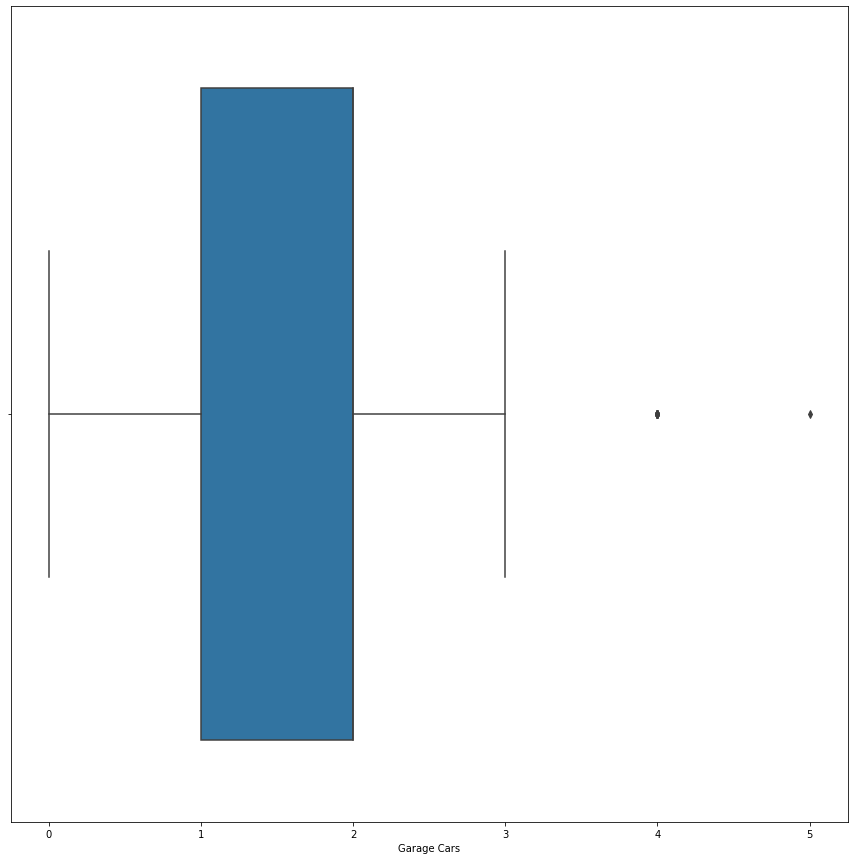

In [69]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df, x = 'Garage Cars', whis = 1.5)

In [70]:
df[(df['Garage Cars']>4)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
746,903236040,30,RM,50.0,8635,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,126500


In [72]:
df[(df['Garage Cars']>3)].index

Int64Index([ 246,  669,  716,  746,  815,  816,  817, 1027, 1059, 1258, 1588,
            1589, 1668, 2278, 2282, 2749, 2904],
           dtype='int64')

In [73]:
df = df.drop(df[(df['Garage Cars']>3)].index)

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

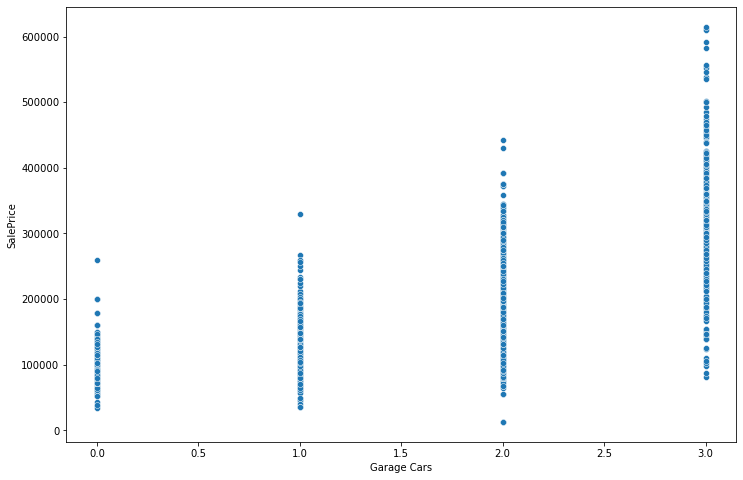

In [74]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Cars',y = 'SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

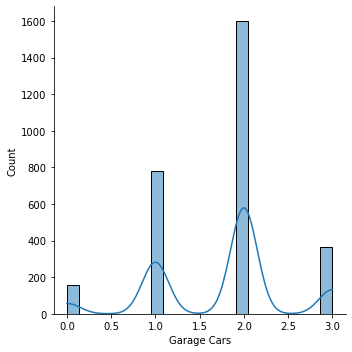

In [75]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Cars'],kde=True)

# Now let's repeat the same steps to remove outliers from a different feature that has high corr with 'SalesPrice' 

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

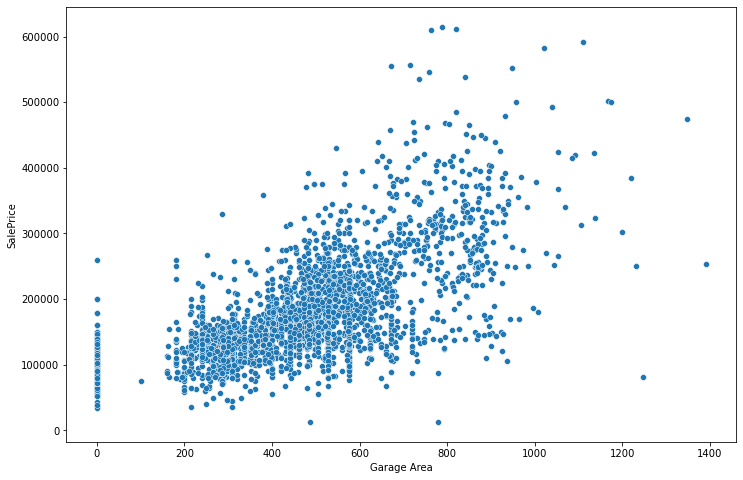

In [76]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Area',y = 'SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

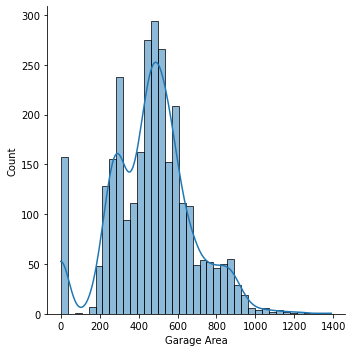

In [77]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Area'],kde=True)

<AxesSubplot:xlabel='Garage Area'>

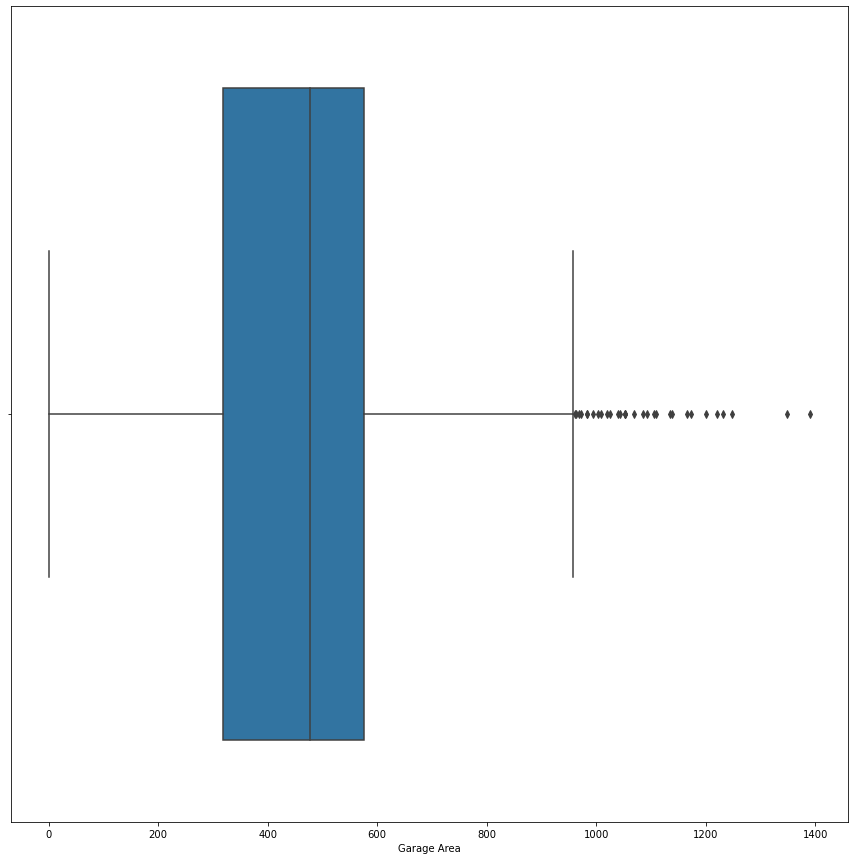

In [78]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df, x = 'Garage Area', whis = 1.5)

In [79]:
df[((df['Garage Area']>1200))]


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
426,528108020,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
862,907250070,20,RL,90.0,11664,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,250000
1052,528104050,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1425,906412010,20,RL,91.0,11778,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Abnorml,475000
1557,911226010,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000


In [80]:
df[((df['Garage Area']>1200))].index

Int64Index([426, 862, 1052, 1425, 1557], dtype='int64')

In [81]:
df[((df['Garage Area']>600)&(df['SalePrice']>500000))]


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
44,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
366,527214050,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
423,528106020,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
432,528110020,20,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,610000
433,528110090,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
456,528176030,20,RL,100.0,14836,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Abnorml,552000
1063,528164060,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,...,144,Ex,NaN,NaN,0,2,2008,WD,Normal,615000
1637,527216080,20,RL,52.0,51974,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,591587
1701,528118050,20,RL,59.0,17169,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,500067


In [82]:
df[((df['Garage Area']>600)&(df['SalePrice']>500000))].index

Int64Index([15, 44, 366, 423, 432, 433, 456, 1063, 1637, 1701, 2330, 2332,
            2334],
           dtype='int64')

In [83]:
df = df.drop(df[((df['Garage Area']>600)&(df['SalePrice']>500000))].index)

In [84]:
df = df.drop(df[((df['Garage Area']>1200))].index)

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

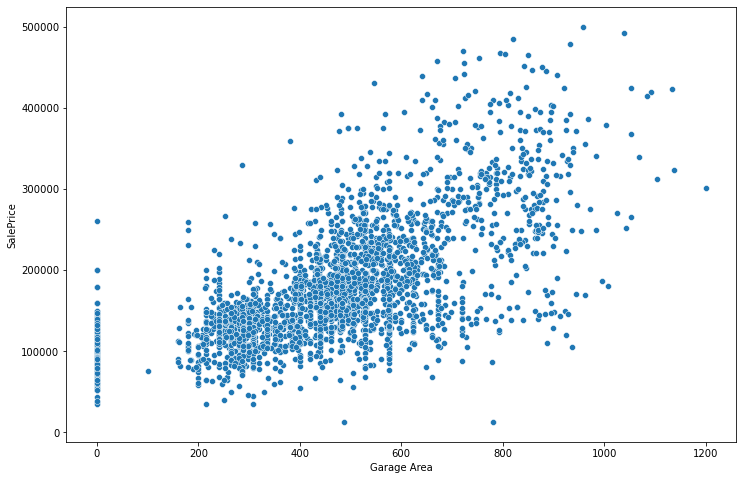

In [85]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Area',y = 'SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

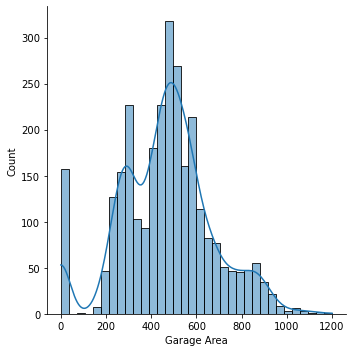

In [86]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Area'],kde=True)

<AxesSubplot:xlabel='Garage Area'>

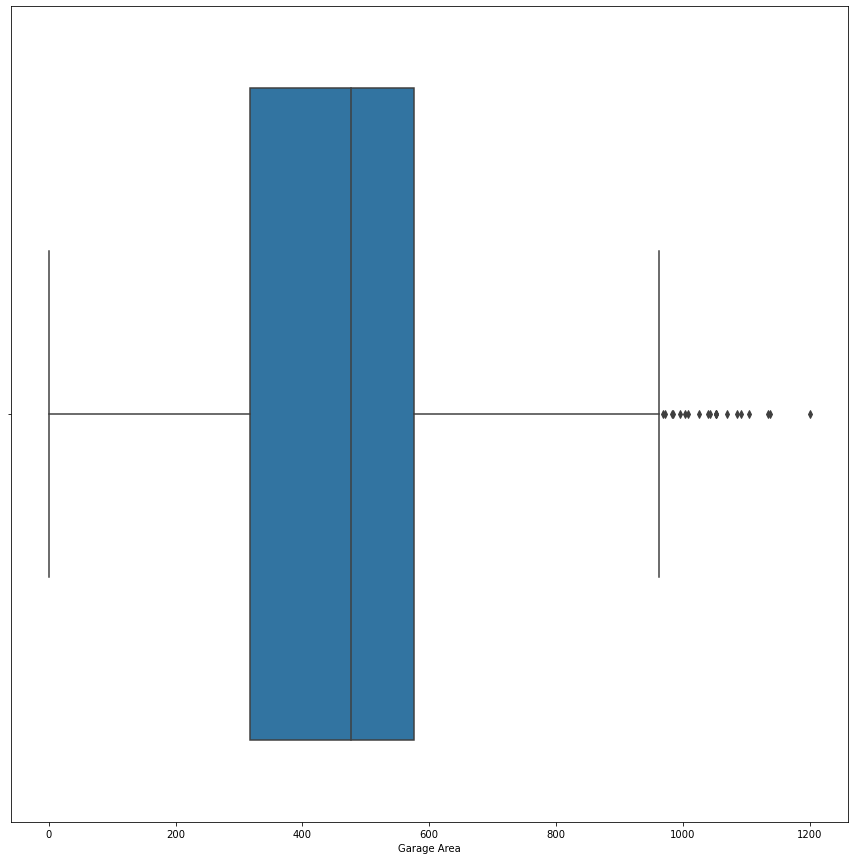

In [87]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df, x = 'Garage Area', whis = 1.5)

In [88]:
df.corr()['SalePrice'].sort_values()

PID               -0.247350
Kitchen AbvGr     -0.137110
Enclosed Porch    -0.131651
Overall Cond      -0.111489
MS SubClass       -0.083306
Low Qual Fin SF   -0.056080
Bsmt Half Bath    -0.043460
Yr Sold           -0.030701
Misc Val          -0.016661
BsmtFin SF 2      -0.003625
Pool Area          0.037616
3Ssn Porch         0.040182
Mo Sold            0.050903
Screen Porch       0.070748
Bedroom AbvGr      0.134027
Bsmt Unf SF        0.191087
2nd Flr SF         0.246305
Lot Area           0.250519
Bsmt Full Bath     0.274370
Half Bath          0.274596
Wood Deck SF       0.325434
Open Porch SF      0.332343
Lot Frontage       0.365873
BsmtFin SF 1       0.428540
Fireplaces         0.472272
Mas Vnr Area       0.476118
TotRms AbvGrd      0.478334
Full Bath          0.546896
Garage Yr Blt      0.547660
Year Remod/Add     0.553056
Year Built         0.591697
1st Flr SF         0.630062
Total Bsmt SF      0.647613
Garage Area        0.656662
Garage Cars        0.670396
Gr Liv Area        0

# Now let's repeat the same steps to remove outliers from a different feature that has high corr with 'SalesPrice' 

In [89]:
df['Total Bsmt SF']

0       1080.0
1        882.0
2       1329.0
3       2110.0
4        928.0
         ...  
2925    1003.0
2926     864.0
2927     912.0
2928    1389.0
2929     996.0
Name: Total Bsmt SF, Length: 2883, dtype: float64

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

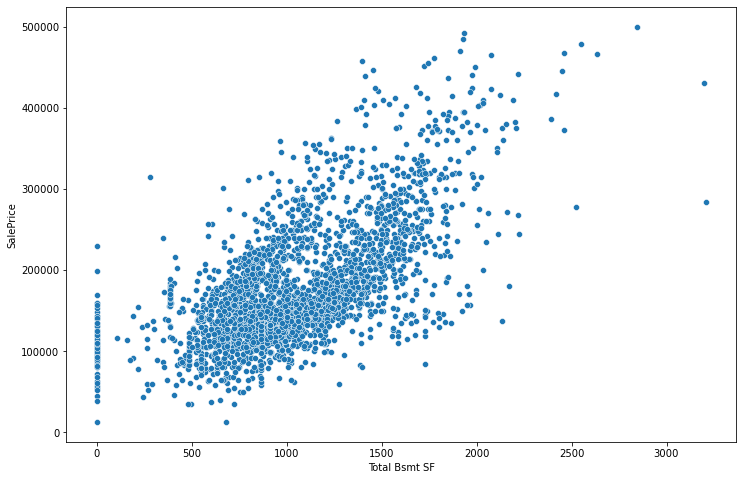

In [90]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Bsmt SF', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

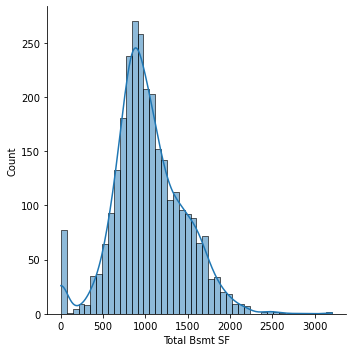

In [91]:
plt.figure(figsize=(15,15))
sns.displot(df['Total Bsmt SF'],kde=True)
plt.show()

<AxesSubplot:xlabel='Total Bsmt SF'>

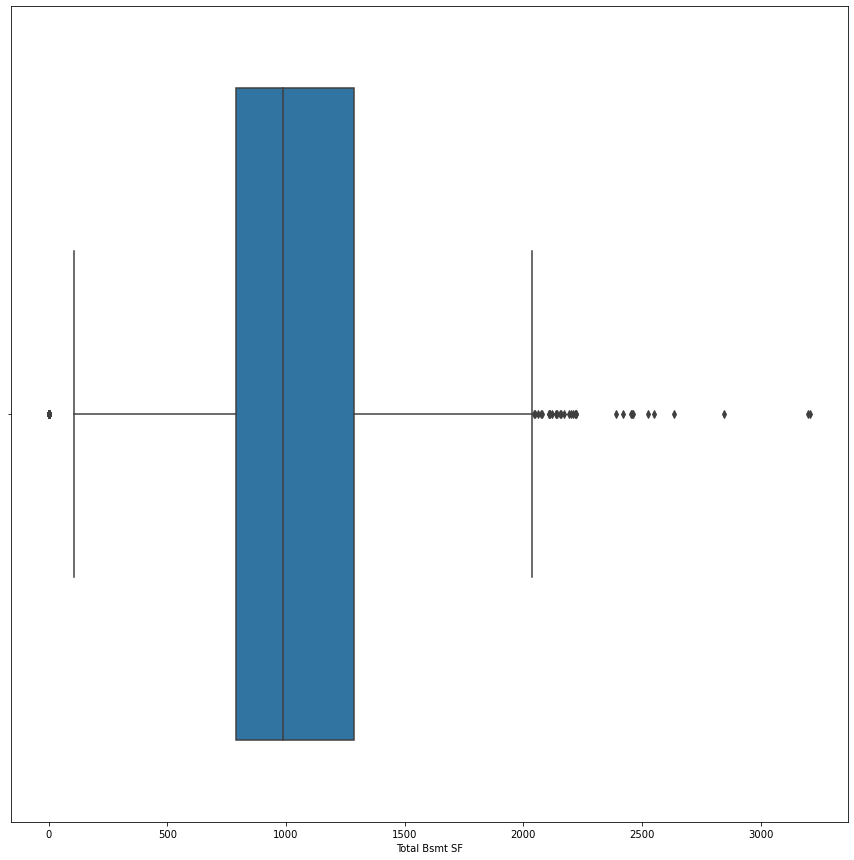

In [92]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Total Bsmt SF',whis=1.5)

In [93]:
df[(df['Total Bsmt SF']>2300)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
46,528176010,20,RL,110.0,14300,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,500000
379,527355150,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,278000
444,528142130,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
447,528166060,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
448,528166090,20,RL,110.0,15274,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,445000
513,528441090,20,RL,85.0,11128,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,10,2009,WD,Normal,468000
1056,528110110,20,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,417500
1695,528110040,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,479069
1763,528327060,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
1772,528366050,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000


In [94]:
df[(df['Total Bsmt SF']>2300)].index


Int64Index([46, 379, 444, 447, 448, 513, 1056, 1695, 1763, 1772, 1860], dtype='int64')

In [95]:
df = df.drop(df[(df['Total Bsmt SF']>2300)].index)

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

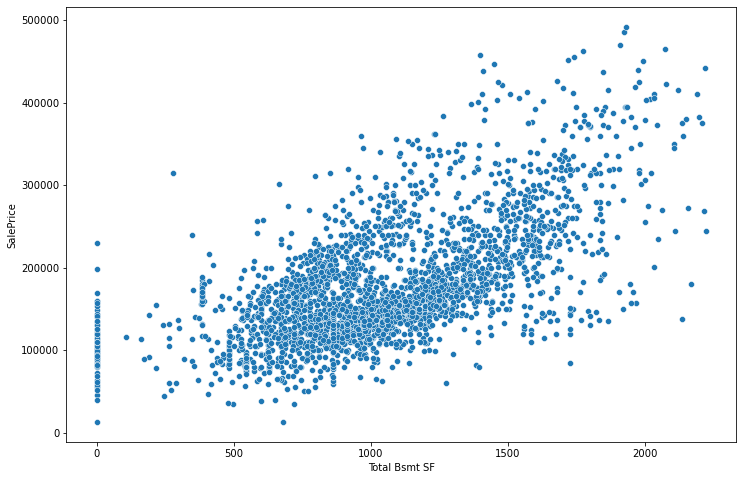

In [96]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Bsmt SF', y ='SalePrice',data=df)

In [97]:
df.corr()['SalePrice'].sort_values()

PID               -0.240928
Kitchen AbvGr     -0.137648
Enclosed Porch    -0.136095
Overall Cond      -0.107639
MS SubClass       -0.074255
Low Qual Fin SF   -0.056075
Bsmt Half Bath    -0.041330
Yr Sold           -0.035601
Misc Val          -0.015833
BsmtFin SF 2      -0.009757
Pool Area          0.039130
3Ssn Porch         0.042391
Mo Sold            0.049604
Screen Porch       0.075888
Bedroom AbvGr      0.135974
Bsmt Unf SF        0.183308
Lot Area           0.250773
2nd Flr SF         0.262050
Bsmt Full Bath     0.266904
Half Bath          0.281336
Wood Deck SF       0.322739
Open Porch SF      0.330013
Lot Frontage       0.358057
BsmtFin SF 1       0.412818
Mas Vnr Area       0.464406
Fireplaces         0.466272
TotRms AbvGrd      0.471795
Full Bath          0.547831
Garage Yr Blt      0.549729
Year Remod/Add     0.556162
Year Built         0.593843
1st Flr SF         0.612916
Total Bsmt SF      0.632738
Garage Area        0.654348
Garage Cars        0.670284
Gr Liv Area        0

# Now let's repeat the same steps to remove outliers from a different feature that has high corr with 'SalesPrice' 

In [98]:
df['1st Flr SF']

0       1656
1        896
2       1329
3       2110
4        928
        ... 
2925    1003
2926     902
2927     970
2928    1389
2929     996
Name: 1st Flr SF, Length: 2872, dtype: int64

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

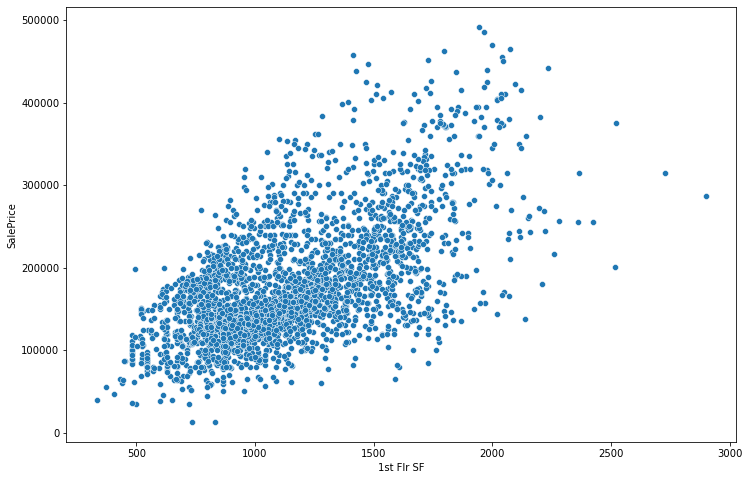

In [99]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st Flr SF', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

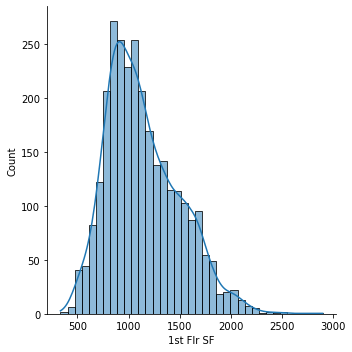

In [100]:
plt.figure(figsize=(15,15))
sns.displot(df['1st Flr SF'],kde=True)
plt.show()

<AxesSubplot:xlabel='1st Flr SF'>

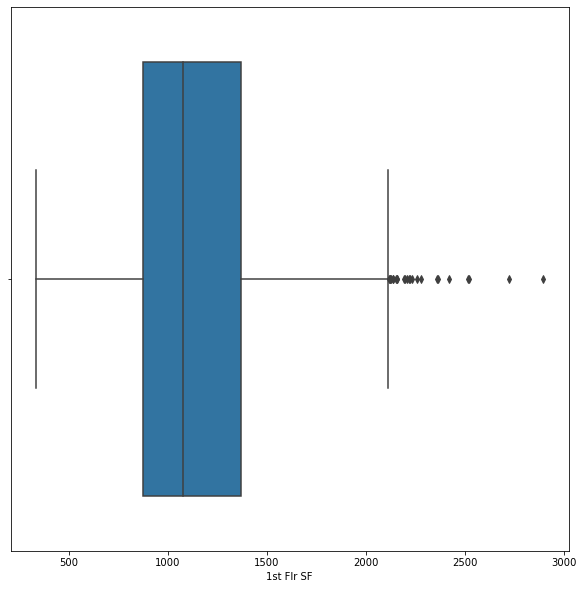

In [101]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x = '1st Flr SF', whis = 1.5)

In [102]:
df[df['1st Flr SF']>2500].index

Int64Index([349, 1572, 2229, 2230], dtype='int64')

In [103]:
df = df.drop(df[df['1st Flr SF']>2500].index)

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

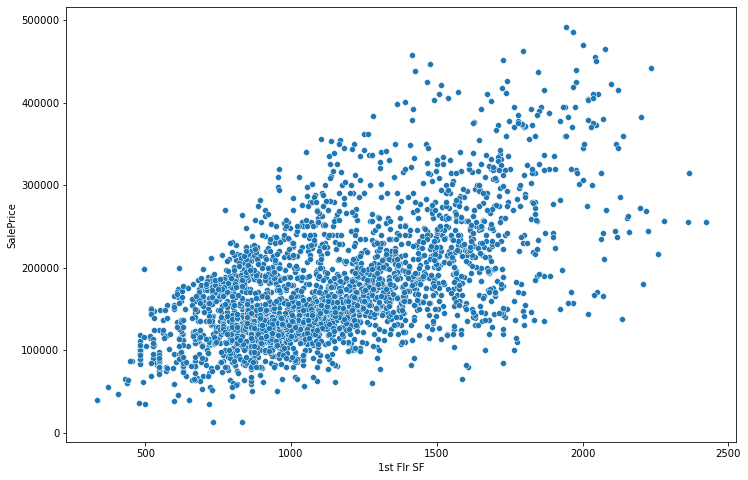

In [104]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st Flr SF', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

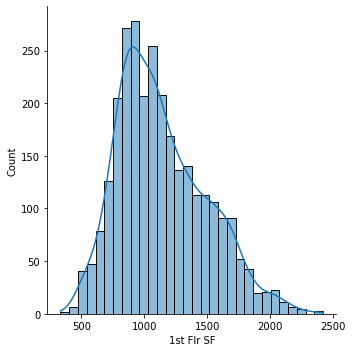

In [105]:
plt.figure(figsize=(15,15))
sns.displot(df['1st Flr SF'],kde=True)
plt.show()

<AxesSubplot:xlabel='1st Flr SF'>

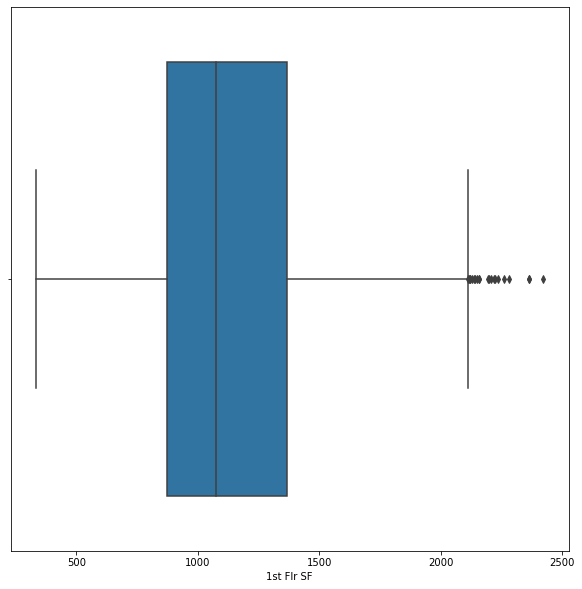

In [106]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x = '1st Flr SF', whis = 1.5)


In [107]:
df.corr()['SalePrice'].sort_values()

PID               -0.242124
Enclosed Porch    -0.139666
Kitchen AbvGr     -0.138583
Overall Cond      -0.107114
MS SubClass       -0.074738
Low Qual Fin SF   -0.055981
Bsmt Half Bath    -0.040862
Yr Sold           -0.036203
Misc Val          -0.015651
BsmtFin SF 2      -0.010408
Pool Area          0.034754
3Ssn Porch         0.042736
Mo Sold            0.047984
Screen Porch       0.076729
Bedroom AbvGr      0.139828
Bsmt Unf SF        0.185603
Lot Area           0.250737
2nd Flr SF         0.264631
Bsmt Full Bath     0.266491
Half Bath          0.282554
Wood Deck SF       0.322772
Open Porch SF      0.330411
Lot Frontage       0.361110
BsmtFin SF 1       0.411314
Fireplaces         0.466236
Mas Vnr Area       0.466909
TotRms AbvGrd      0.471417
Full Bath          0.547929
Garage Yr Blt      0.550000
Year Remod/Add     0.556873
Year Built         0.594039
1st Flr SF         0.612479
Total Bsmt SF      0.633937
Garage Area        0.654453
Garage Cars        0.671160
Gr Liv Area        0

# Now let's repeat the same steps to remove outliers from a different feature that has high corr with 'SalesPrice' 

In [109]:
df['Year Built']

0       1960
1       1961
2       1958
3       1968
4       1997
        ... 
2925    1984
2926    1983
2927    1992
2928    1974
2929    1993
Name: Year Built, Length: 2868, dtype: int64

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

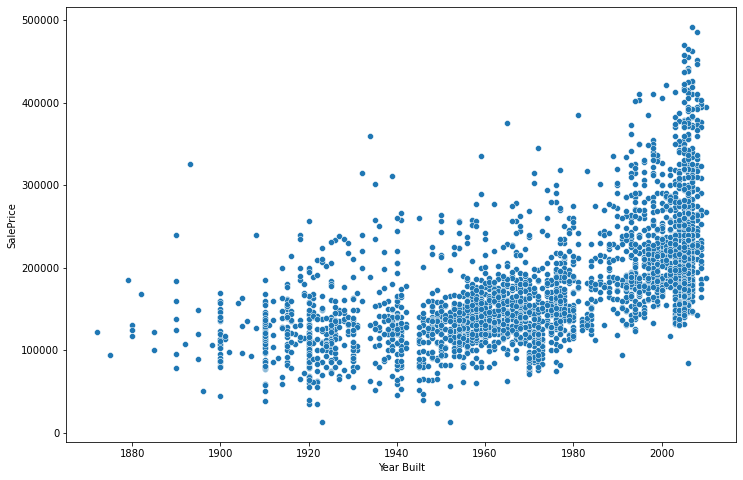

In [110]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Built', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

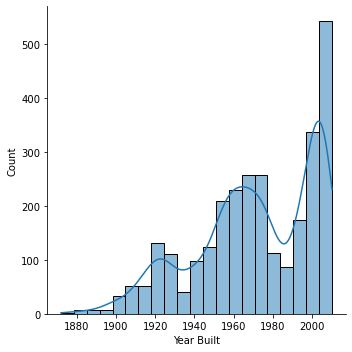

In [111]:
plt.figure(figsize=(15,15))
sns.displot(df['Year Built'],kde=True)
plt.show()

In [112]:
df[(df['Year Built']<1940)&(df['SalePrice']>300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1320,902401120,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1538,909425010,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,311500
1945,535355020,70,RL,113.0,21281,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Family,301600
2214,909276160,70,RL,78.0,12168,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2007,WD,Alloca,359100
2218,909281130,70,RL,70.0,10570,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,315000


In [113]:
df[(df['Year Built']<1940)&(df['SalePrice']>300000)].index

Int64Index([1320, 1538, 1945, 2214, 2218], dtype='int64')

In [114]:
df = df.drop(df[(df['Year Built']<1940)&(df['SalePrice']>300000)].index)

<Figure size 1080x1080 with 0 Axes>

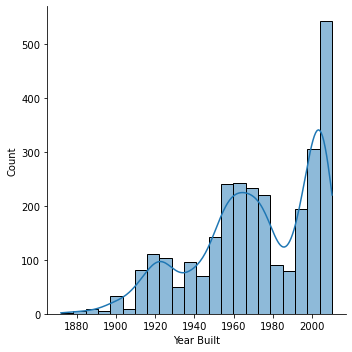

In [115]:
plt.figure(figsize=(15,15))
sns.displot(df['Year Built'],kde=True)
plt.show()

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

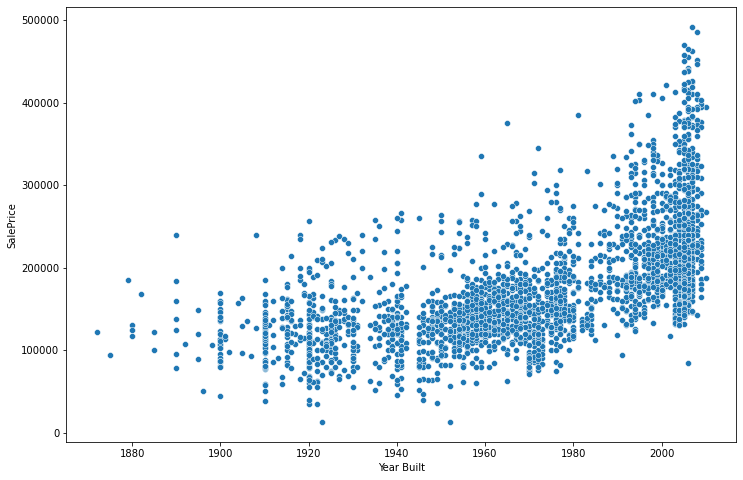

In [116]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Built', y ='SalePrice',data=df)

In [117]:
df[(df['Year Built']<1900)&(df['SalePrice']>200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
185,902329030,70,RM,50.0,9000,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,240000


In [118]:
df[(df['Year Built']<1900)&(df['SalePrice']>200000)].index

Int64Index([185], dtype='int64')

In [119]:
df = df.drop(df[(df['Year Built']<1900)&(df['SalePrice']>200000)].index)

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

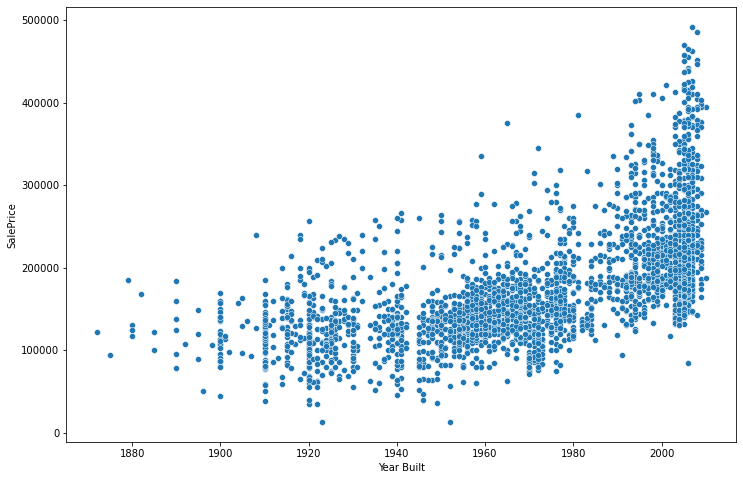

In [120]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Built', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

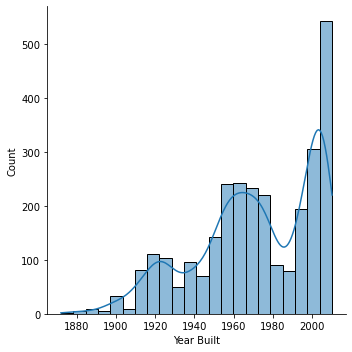

In [121]:
plt.figure(figsize=(15,15))
sns.displot(df['Year Built'],kde=True)
plt.show()

In [122]:
df.corr()['SalePrice'].sort_values()

PID               -0.246091
Enclosed Porch    -0.143710
Kitchen AbvGr     -0.138343
Overall Cond      -0.114506
MS SubClass       -0.075943
Low Qual Fin SF   -0.055807
Bsmt Half Bath    -0.042895
Yr Sold           -0.035805
Misc Val          -0.015338
BsmtFin SF 2      -0.009300
Pool Area          0.035091
3Ssn Porch         0.043310
Mo Sold            0.045110
Screen Porch       0.076475
Bedroom AbvGr      0.137882
Bsmt Unf SF        0.185460
Lot Area           0.249833
2nd Flr SF         0.258580
Bsmt Full Bath     0.270910
Half Bath          0.279791
Wood Deck SF       0.326458
Open Porch SF      0.327719
Lot Frontage       0.360966
BsmtFin SF 1       0.415173
Fireplaces         0.464822
TotRms AbvGrd      0.467869
Mas Vnr Area       0.470054
Full Bath          0.547279
Garage Yr Blt      0.555856
Year Remod/Add     0.556330
Year Built         0.604610
1st Flr SF         0.611771
Total Bsmt SF      0.638506
Garage Area        0.655653
Garage Cars        0.671961
Gr Liv Area        0

# Now let's repeat the same steps to remove outliers from a different feature that has high corr with 'SalesPrice' 

In [123]:
df['Full Bath']

0       1
1       1
2       1
3       2
4       2
       ..
2925    1
2926    1
2927    1
2928    1
2929    2
Name: Full Bath, Length: 2862, dtype: int64

<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

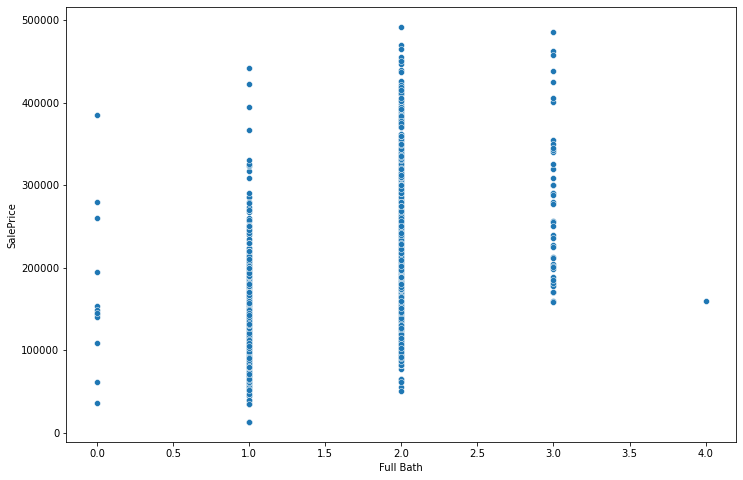

In [124]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Full Bath', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

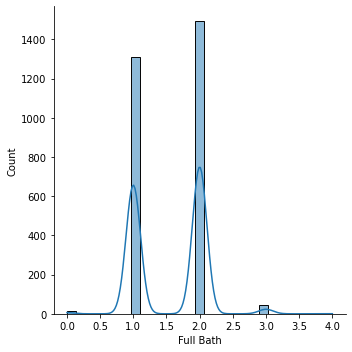

In [125]:
plt.figure(figsize=(15,15))
sns.displot(df['Full Bath'],kde=True)
plt.show()

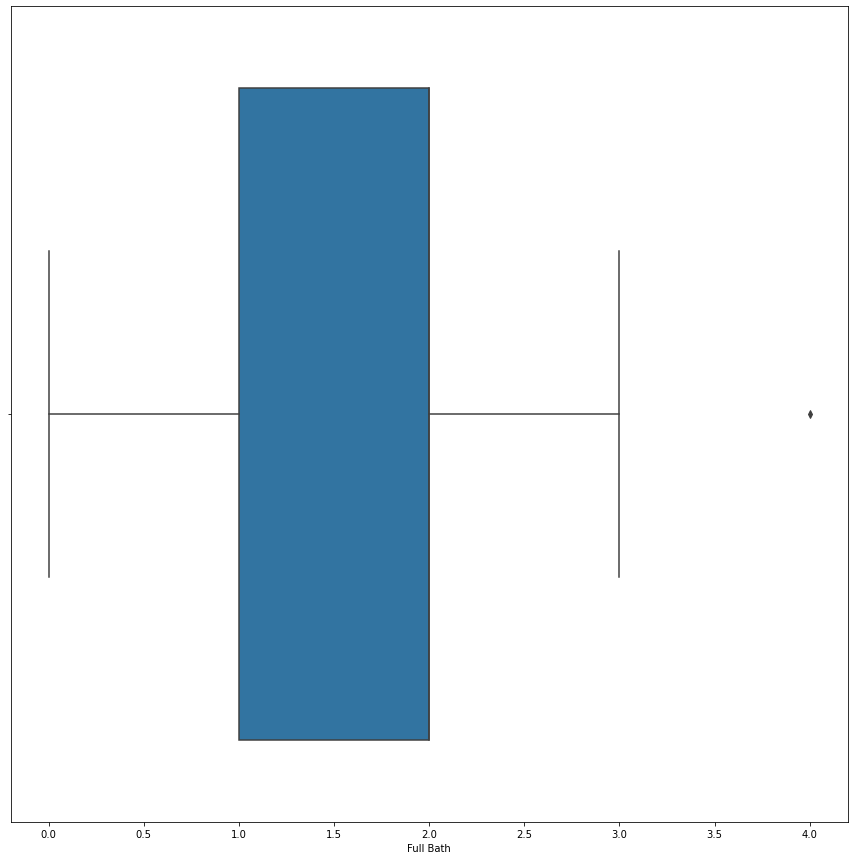

In [126]:
plt.figure(figsize=(15,15))
sns.boxplot(data = df, x = 'Full Bath', whis = 1.5)
plt.show()

In [127]:
df[(df['Full Bath']>3.5)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
336,923276250,90,RL,70.0,7700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,600,2,2010,WD,Normal,159000


In [128]:
df[(df['Full Bath']>3.5)].index

Int64Index([336], dtype='int64')

In [129]:
df = df.drop(df[(df['Full Bath']>3.5)].index)

<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

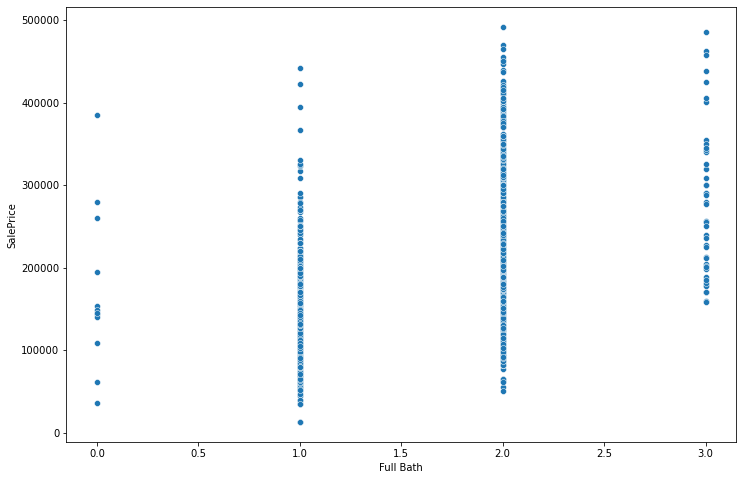

In [130]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Full Bath', y ='SalePrice',data=df)

# Now let's repeat the same steps to remove outliers from a different feature that has high corr with 'SalesPrice' 

In [131]:
df['Year Remod/Add']

0       1960
1       1961
2       1958
3       1968
4       1998
        ... 
2925    1984
2926    1983
2927    1992
2928    1975
2929    1994
Name: Year Remod/Add, Length: 2861, dtype: int64

<Figure size 1080x1080 with 0 Axes>

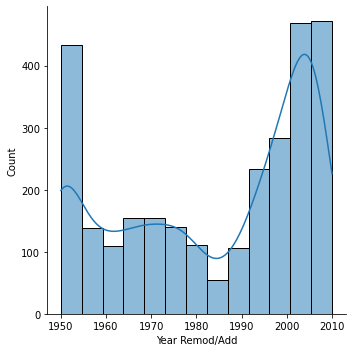

In [132]:
plt.figure(figsize=(15,15))
sns.displot(df['Year Remod/Add'],kde=True)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Year Remod/Add',whis=1.5,data=df)

<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

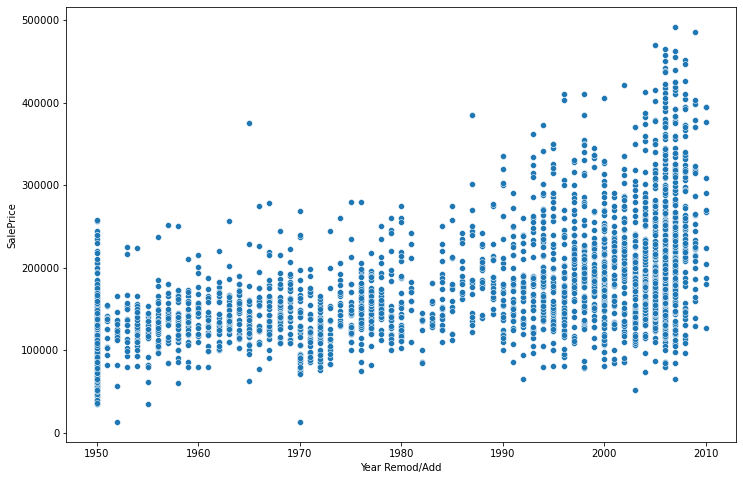

In [133]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Remod/Add', y ='SalePrice',data=df)

In [134]:
df[((df['Year Remod/Add']>1960)&(df['Year Remod/Add']<1990))&(df['SalePrice']>300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
956,916176125,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
2092,906201200,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000
2522,533350050,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


In [135]:
df[((df['Year Remod/Add']>1960)&(df['Year Remod/Add']<1990))&(df['SalePrice']>300000)].index

Int64Index([956, 2092, 2522], dtype='int64')

In [136]:
df = df.drop(df[((df['Year Remod/Add']>1960)&(df['Year Remod/Add']<1990))&(df['SalePrice']>300000)].index)

<AxesSubplot:xlabel='Year Remod/Add'>

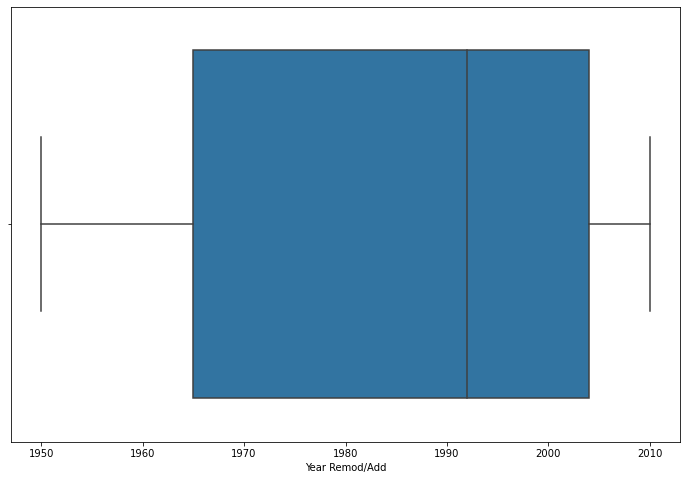

In [137]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Year Remod/Add',whis=1.5,data=df)

<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

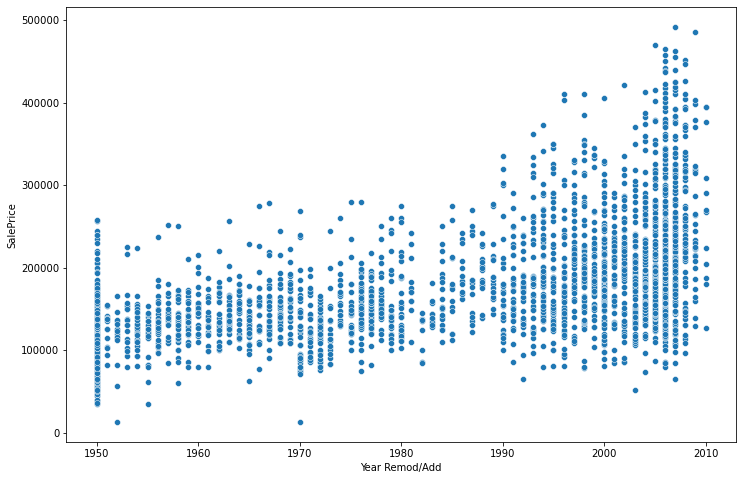

In [138]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Remod/Add', y ='SalePrice',data=df)

<Figure size 1080x1080 with 0 Axes>

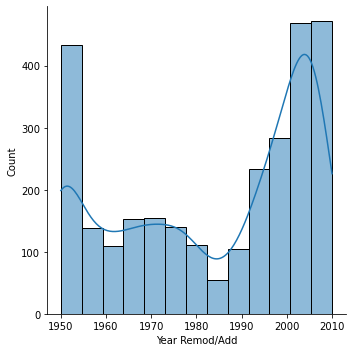

In [139]:
plt.figure(figsize=(15,15))
sns.displot(df['Year Remod/Add'],kde=True)
plt.show()

# Now let's repeat the same steps to remove outliers from a different feature that has high corr with 'SalesPrice' 

In [153]:
df.corr()['SalePrice'].sort_values()

PID               -0.247519
Enclosed Porch    -0.141455
Kitchen AbvGr     -0.138690
Overall Cond      -0.112652
MS SubClass       -0.074415
Low Qual Fin SF   -0.055867
Bsmt Half Bath    -0.042614
Yr Sold           -0.033632
BsmtFin SF 2      -0.019398
Misc Val          -0.015119
Pool Area          0.035351
Mo Sold            0.042687
3Ssn Porch         0.043711
Screen Porch       0.077380
Bedroom AbvGr      0.141773
Bsmt Unf SF        0.189311
Lot Area           0.254582
2nd Flr SF         0.260877
Bsmt Full Bath     0.265780
Half Bath          0.280341
Wood Deck SF       0.323245
Open Porch SF      0.329599
Lot Frontage       0.358937
BsmtFin SF 1       0.412404
Fireplaces         0.463053
TotRms AbvGrd      0.469682
Mas Vnr Area       0.472480
Full Bath          0.553564
Year Remod/Add     0.558043
Garage Yr Blt      0.561475
Year Built         0.605344
1st Flr SF         0.609563
Total Bsmt SF      0.636219
Garage Area        0.655746
Garage Cars        0.672135
Gr Liv Area        0

In [141]:
df['Garage Yr Blt']

0       1960.0
1       1961.0
2       1958.0
3       1968.0
4       1997.0
         ...  
2925    1984.0
2926    1983.0
2927       NaN
2928    1975.0
2929    1993.0
Name: Garage Yr Blt, Length: 2858, dtype: float64

<Figure size 1080x1080 with 0 Axes>

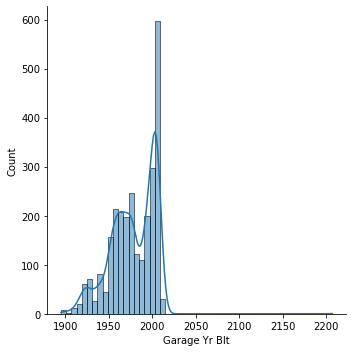

In [142]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Yr Blt'],kde=True)
plt.show()

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

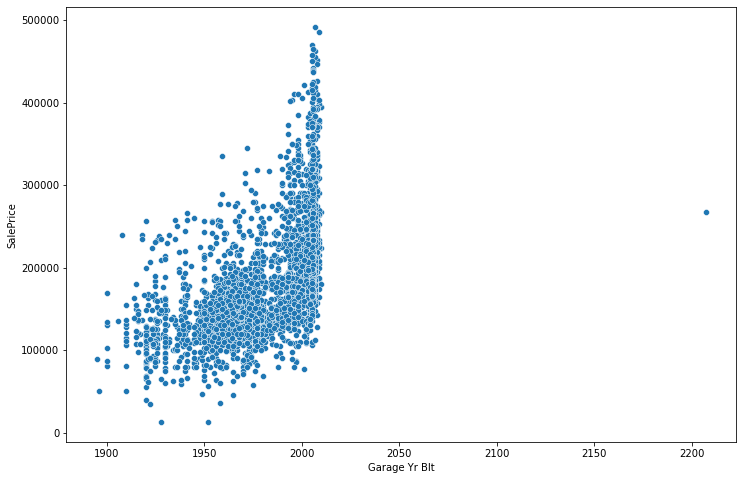

In [143]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Yr Blt', y ='SalePrice',data=df)

<AxesSubplot:xlabel='Garage Yr Blt'>

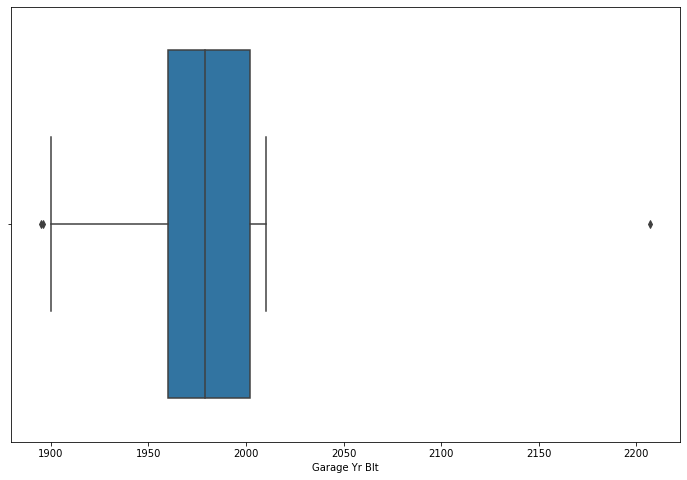

In [144]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Garage Yr Blt',whis=1.5,data=df)

In [145]:
df[(df['Garage Yr Blt']<1900)|(df['Garage Yr Blt']>2050)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
307,911204100,30,C (all),66.0,8712,Grvl,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Alloca,50138
1554,911102090,70,C (all),60.0,5280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,89000
2260,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,267300


In [146]:
df[(df['Garage Yr Blt']<1900)|(df['Garage Yr Blt']>2050)].index

Int64Index([307, 1554, 2260], dtype='int64')

In [147]:
df = df.drop(df[(df['Garage Yr Blt']<1900)|(df['Garage Yr Blt']>2050)].index)

<Figure size 1080x1080 with 0 Axes>

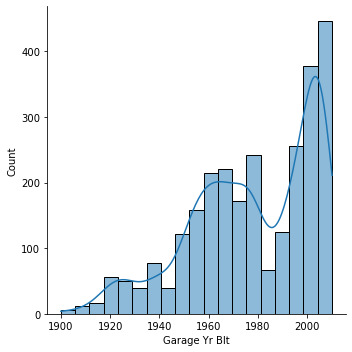

In [148]:
plt.figure(figsize=(15,15))
sns.displot(df['Garage Yr Blt'],kde=True)
plt.show()

<AxesSubplot:xlabel='Garage Yr Blt'>

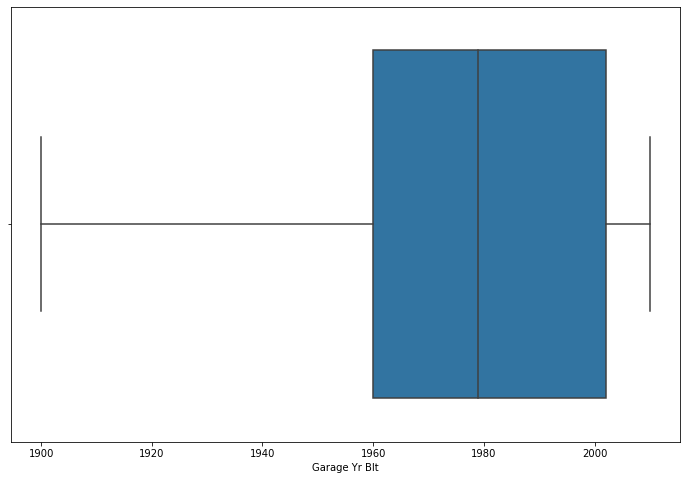

In [150]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Garage Yr Blt', data = df, whis = 1.5 )

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

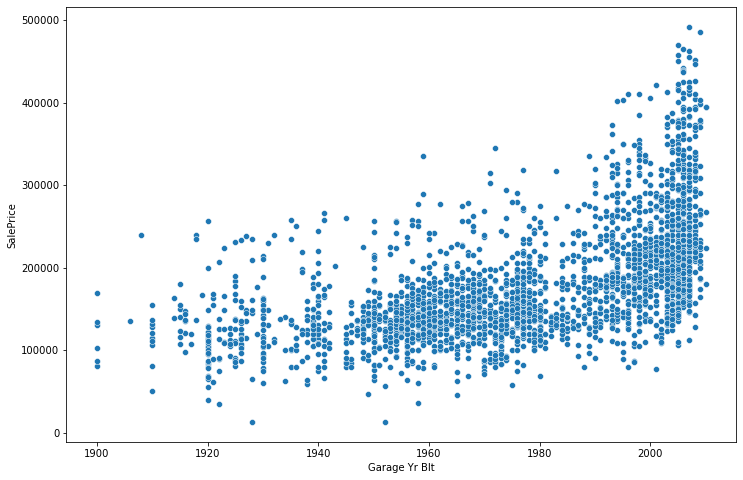

In [151]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Yr Blt', y ='SalePrice',data=df)

In [152]:
df.corr()['SalePrice'].sort_values()

PID               -0.247519
Enclosed Porch    -0.141455
Kitchen AbvGr     -0.138690
Overall Cond      -0.112652
MS SubClass       -0.074415
Low Qual Fin SF   -0.055867
Bsmt Half Bath    -0.042614
Yr Sold           -0.033632
BsmtFin SF 2      -0.019398
Misc Val          -0.015119
Pool Area          0.035351
Mo Sold            0.042687
3Ssn Porch         0.043711
Screen Porch       0.077380
Bedroom AbvGr      0.141773
Bsmt Unf SF        0.189311
Lot Area           0.254582
2nd Flr SF         0.260877
Bsmt Full Bath     0.265780
Half Bath          0.280341
Wood Deck SF       0.323245
Open Porch SF      0.329599
Lot Frontage       0.358937
BsmtFin SF 1       0.412404
Fireplaces         0.463053
TotRms AbvGrd      0.469682
Mas Vnr Area       0.472480
Full Bath          0.553564
Year Remod/Add     0.558043
Garage Yr Blt      0.561475
Year Built         0.605344
1st Flr SF         0.609563
Total Bsmt SF      0.636219
Garage Area        0.655746
Garage Cars        0.672135
Gr Liv Area        0

# Now let's repeat the same steps to remove outliers from a different feature that has high corr with 'SalesPrice' 

In [154]:
df['Mas Vnr Area']

0       112.0
1         0.0
2       108.0
3         0.0
4         0.0
        ...  
2925      0.0
2926      0.0
2927      0.0
2928      0.0
2929     94.0
Name: Mas Vnr Area, Length: 2855, dtype: float64

<Figure size 1080x1080 with 0 Axes>

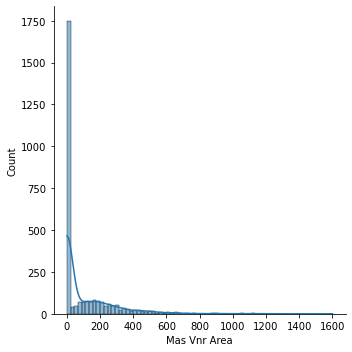

In [155]:
plt.figure(figsize=(15,15))
sns.displot(df['Mas Vnr Area'],kde=True)
plt.show()

<AxesSubplot:xlabel='Mas Vnr Area', ylabel='SalePrice'>

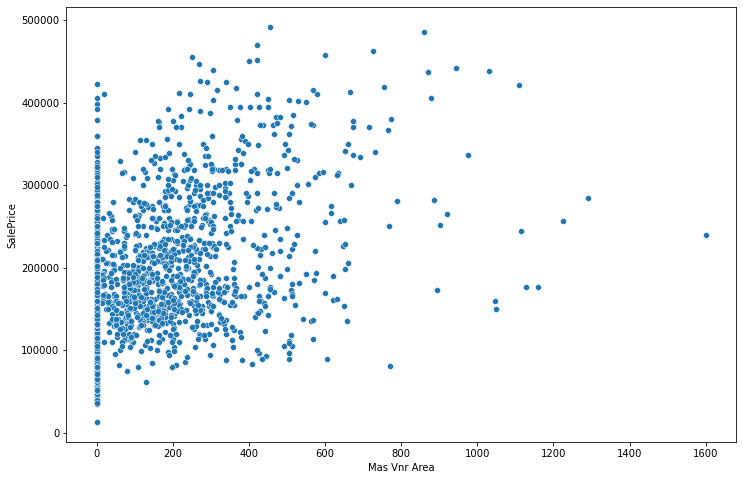

In [156]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Mas Vnr Area', y ='SalePrice',data=df)

<AxesSubplot:xlabel='Mas Vnr Area'>

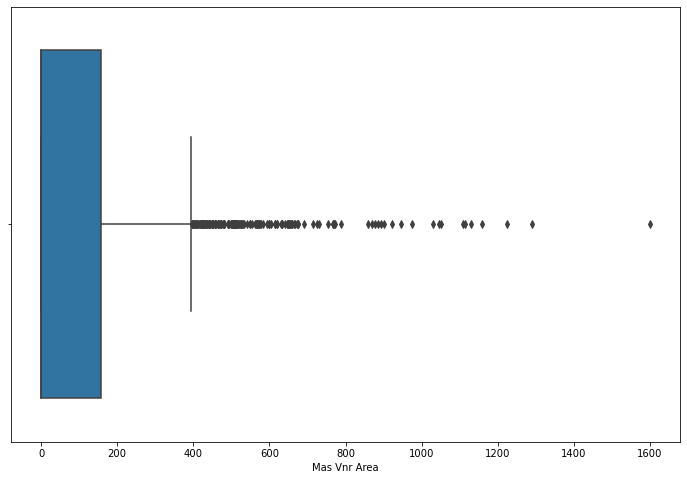

In [157]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Mas Vnr Area',whis=1.5,data=df)

In [169]:
df[(df['Mas Vnr Area']>700)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
169,902102100,50,RM,60.0,4800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,COD,Abnorml,80400
421,528102140,60,RL,110.0,14257,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,462000
497,528344040,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,340000
1070,528180140,120,RL,65.0,8769,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,New,Partial,367294
1074,528186130,120,RL,89.0,8232,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,370967
1124,528478030,60,FV,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,250000
1697,528110100,60,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,380000
1780,528431040,20,RL,98.0,12291,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,419005
2396,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,281000


In [175]:
df = df.drop(df[(df['Mas Vnr Area']>700)].index)

<Figure size 1080x1080 with 0 Axes>

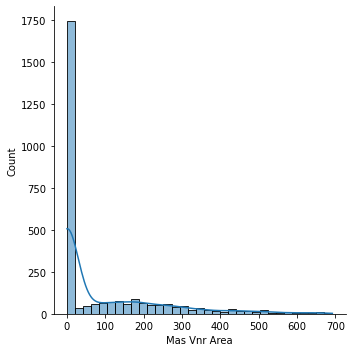

In [176]:
plt.figure(figsize=(15,15))
sns.displot(df['Mas Vnr Area'],kde=True)
plt.show()

<AxesSubplot:xlabel='Mas Vnr Area', ylabel='SalePrice'>

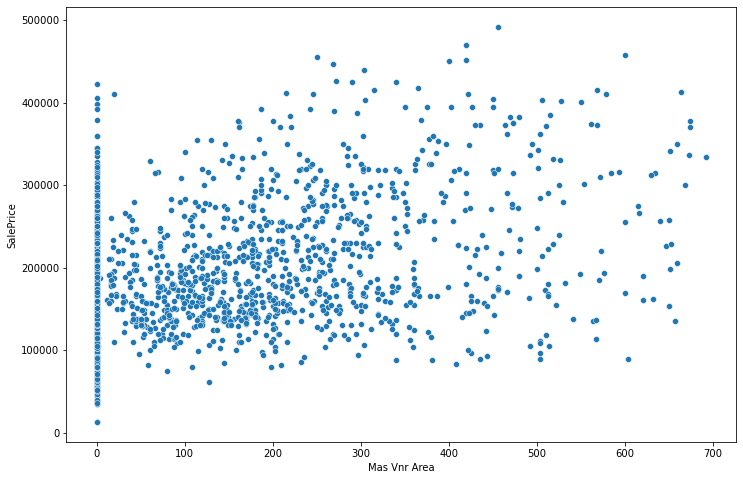

In [177]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Mas Vnr Area', y ='SalePrice',data=df)

<AxesSubplot:xlabel='Mas Vnr Area'>

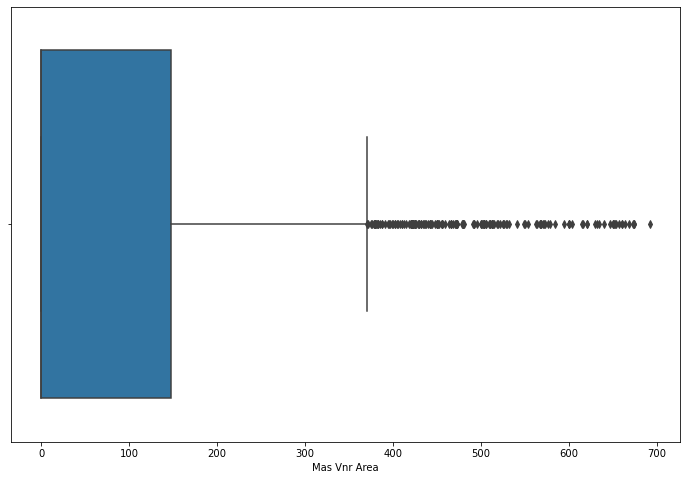

In [178]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Mas Vnr Area',whis=1.5,data=df)

In [179]:
df.to_csv('Aqram_Project1_CleaningOutliers_data.csv',index=False)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2827 non-null   int64  
 1   MS SubClass      2827 non-null   int64  
 2   MS Zoning        2827 non-null   object 
 3   Lot Frontage     2353 non-null   float64
 4   Lot Area         2827 non-null   int64  
 5   Street           2827 non-null   object 
 6   Alley            192 non-null    object 
 7   Lot Shape        2827 non-null   object 
 8   Land Contour     2827 non-null   object 
 9   Utilities        2827 non-null   object 
 10  Lot Config       2827 non-null   object 
 11  Land Slope       2827 non-null   object 
 12  Neighborhood     2827 non-null   object 
 13  Condition 1      2827 non-null   object 
 14  Condition 2      2827 non-null   object 
 15  Bldg Type        2827 non-null   object 
 16  House Style      2827 non-null   object 
 17  Overall Qual  